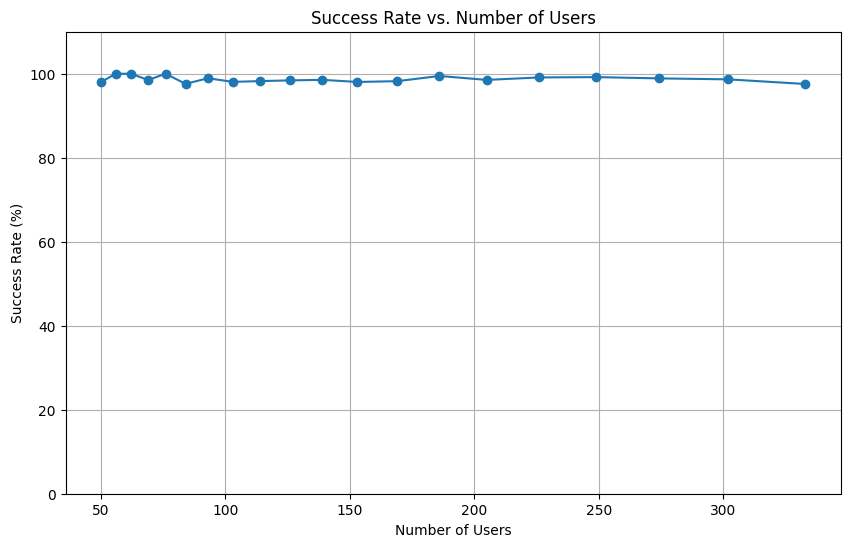

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Dictionary to hold dataframes
dict_df = {}

# Read all request stats files
for file in glob.glob("../output/request_stats_*.csv"):
    request_stats = pd.read_csv(file)
    dict_df[file] = request_stats

# Prepare lists to store results
user_counts = []
success_rates = []

# Process each file
for file, request_stats in dict_df.items():
    # Count the number of completed and failed requests
    completed_requests = request_stats[
        request_stats["status"] == "RequestStatus.COMPLETED"
    ].shape[0]
    failed_requests = request_stats[
        request_stats["status"] == "RequestStatus.FAILED"
    ].shape[0]

    # Calculate the success rate
    success_rate = (
        completed_requests / (completed_requests + failed_requests)
        if (completed_requests + failed_requests) > 0
        else 0
    )
    success_rates.append(success_rate * 100)

    # Extract user count from file name (assuming format includes user count)
    # Example filename: request_stats_user10.csv
    user_count = int(file.split("_")[-1].replace(".csv", "").replace("user", ""))
    user_counts.append(user_count)

# Combine and sort the data by user count
data = list(zip(user_counts, success_rates))
data.sort(key=lambda x: x[0])  # Sort by user count

# Unzip the sorted data
sorted_user_counts, sorted_success_rates = zip(*data)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sorted_user_counts, sorted_success_rates, marker="o", linestyle="-")
plt.title("Success Rate vs. Number of Users")
plt.xlabel("Number of Users")
plt.ylabel("Success Rate (%)")
plt.ylim(0, 110)  # Ensure success rate stays between 0 and 1
plt.grid()
plt.show()